### Dataset: https://ninapro.hevs.ch/instructions/DB2.html

This page provides thorough explanation of the dataset and signal acquisition, as well as info on dataset variables.

In [38]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

##### Loading and analyzing the data of subject 1.

- Each subject has three mat files, one for each "exercise".
- E1 has movements 1-17, E2: 18-40, E3: 41:49. 
- Note that movement 0 is rest.
- Sampling rate is 2000 Hz, so sampling duration is 1/2000 (0.5ms) per sample. 

In [39]:
# Load exercise 1 
data = sio.loadmat('toy_semg/S1/S1_E1_A1.mat')

# Read the data
emg = data['emg']              
stimulus = data['stimulus']     # Movement labels 
repetition = data['repetition'] # Repetitions of the movement

# Print info
print(f"EMG shape: {emg.shape}")
print(f"Movements: {np.unique(stimulus)}")
print(f"Repetition: {np.unique(repetition)}")
print("Duration (seconds):", emg.shape[0] / 2000)  # sample at 2000 Hz

EMG shape: (1808331, 12)
Movements: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Repetition: [0 1 2 3 4 5 6]
Duration (seconds): 904.1655


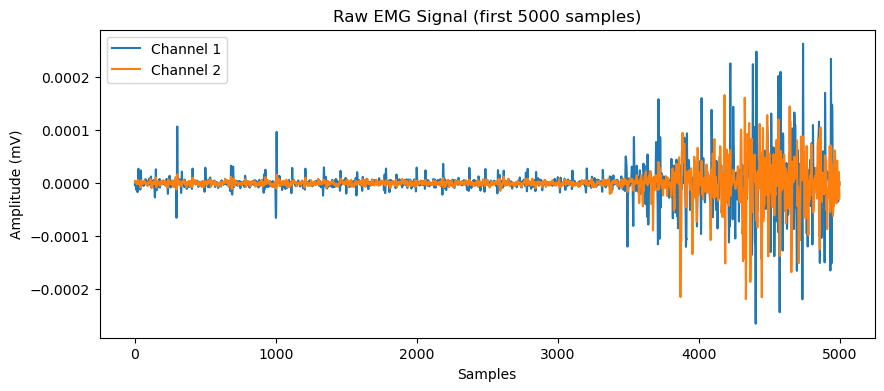

In [40]:
# Plotting sample emg
plt.figure(figsize=(10,4))
plt.plot(emg[:5000, 0], label='Channel 1')
plt.plot(emg[:5000, 1], label='Channel 2') # Note only used channel 1 and 2, there are 12 total 
plt.title("Raw EMG Signal (first 5000 samples)")
plt.xlabel("Samples")
plt.ylabel("Amplitude (mV)")
plt.legend()
plt.show()

Text(0, 0.5, 'Stimulus ID')

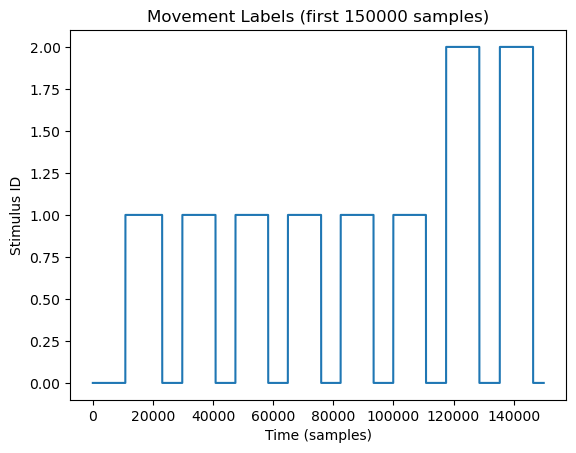

In [41]:
# Viewing transitions of movements over time
plt.plot(stimulus[:150000])
plt.title("Movement Labels (first 150000 samples)")
plt.xlabel("Time (samples)")
plt.ylabel("Stimulus ID")

In [42]:
# Load exercise 2
data = sio.loadmat('toy_semg/S1/S1_E2_A1.mat')

# Read the data
emg = data['emg']              
stimulus = data['stimulus']     # Movement labels (which movement)
repetition = data['repetition'] 

# Print info
print(f"EMG shape: {emg.shape}")
print(f"Movements: {np.unique(stimulus)}")
print(f"Repetitions: {np.unique(repetition)}")
print("Duration (seconds):", emg.shape[0] / 2000)  # sample at 2000 Hz


EMG shape: (2553289, 12)
Movements: [ 0 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
Repetitions: [0 1 2 3 4 5 6]
Duration (seconds): 1276.6445


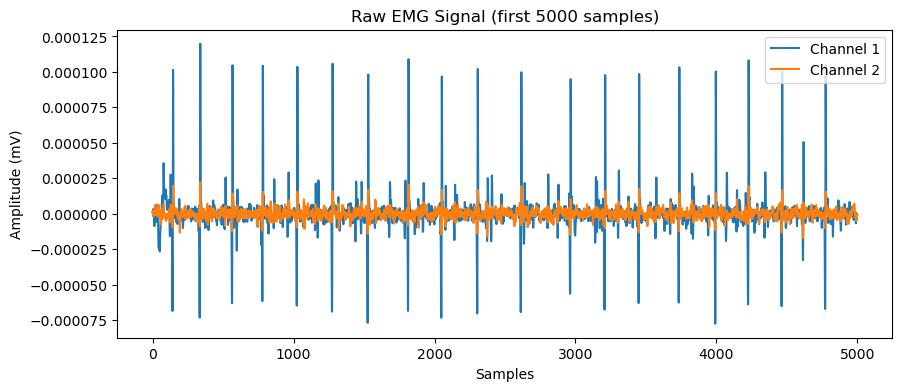

In [43]:
# Plotting sample emg
plt.figure(figsize=(10,4))
plt.plot(emg[:5000, 0], label='Channel 1')
plt.plot(emg[:5000, 1], label='Channel 2') # Note only used channel 1 and 2, there are 12 total 
plt.title("Raw EMG Signal (first 5000 samples)")
plt.xlabel("Samples")
plt.ylabel("Amplitude (mV)")
plt.legend()
plt.show()

Text(0, 0.5, 'Stimulus ID')

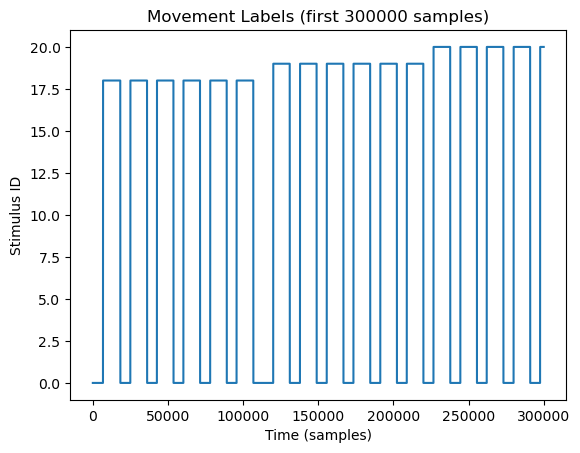

In [44]:
# Viewing transitions of movements over time
plt.plot(stimulus[:300000])
plt.title("Movement Labels (first 300000 samples)")
plt.xlabel("Time (samples)")
plt.ylabel("Stimulus ID")

In [45]:
# Load exercise 3
data = sio.loadmat('toy_semg/S1/S1_E3_A1.mat')

# Read the data
emg = data['emg']              
stimulus = data['stimulus']     # Movement labels (which movement)
repetition = data['repetition'] 

# Print info
print(f"EMG shape: {emg.shape}")
print(f"Movements: {np.unique(stimulus)}")
print(f"Repetitions: {np.unique(repetition)}")
print("Duration (seconds):", emg.shape[0] / 2000)  # sample at 2000 Hz


EMG shape: (877073, 12)
Movements: [ 0 41 42 43 44 45 46 47 48 49]
Repetitions: [0 1 2 3 4 5 6]
Duration (seconds): 438.5365


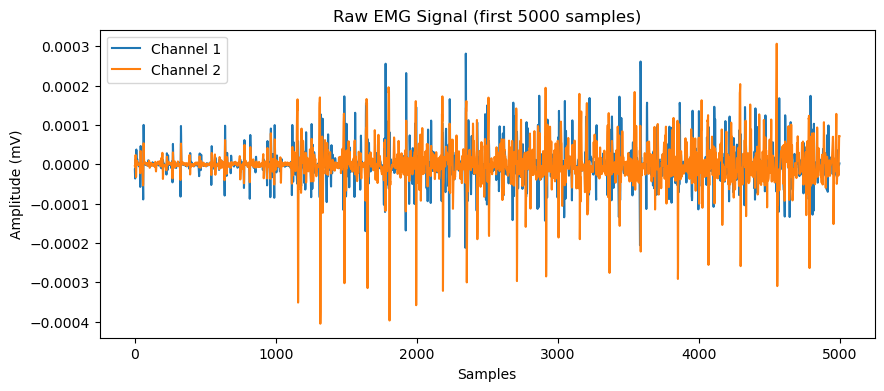

In [46]:
# Plotting sample emg
plt.figure(figsize=(10,4))
plt.plot(emg[:5000, 0], label='Channel 1')
plt.plot(emg[:5000, 1], label='Channel 2') # Note only used channel 1 and 2, there are 12 total 
plt.title("Raw EMG Signal (first 5000 samples)")
plt.xlabel("Samples")
plt.ylabel("Amplitude (mV)")
plt.legend()
plt.show()

Text(0, 0.5, 'Stimulus ID')

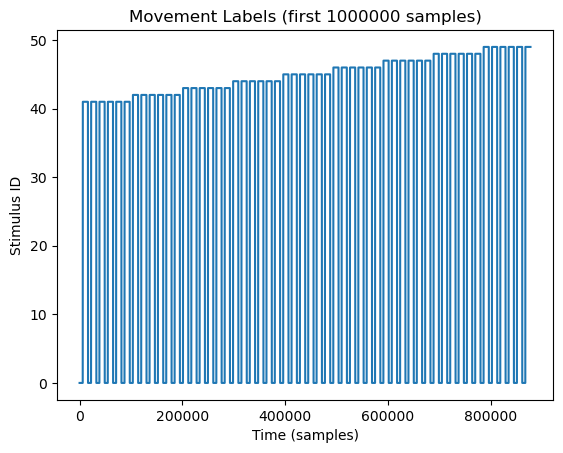

In [47]:
# Viewing transitions of movements over time
plt.plot(stimulus[:1000000])
plt.title("Movement Labels (first 1000000 samples)")
plt.xlabel("Time (samples)")
plt.ylabel("Stimulus ID")

### Label information
The raw stimulus/movement labels in NinaPro DB2 represent gesture IDs (1–49), where each number corresponds to a specific hand or finger movement. Exercise 2 and 3 of each subject (labels 18-49) contain more complicated gestures that involve more complicated movements which may be more difficult to map as compared to Exercise 1. 

To make the the raw mat file data compatible for model input, we map each gesture ID to a 5-bit binary vector indicating which fingers (thumb, index, middle, ring, little) are active. This is so the output aligns with the model’s 5 sigmoid neurons for multi-finger prediction.